In [13]:
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
import pandas as pd

In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
# player dictionary
nba_players = players.get_players()
player_dict = [player for player in nba_players if player['full_name'] == 'Aaron Gordon'][0]
# career df
career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
career_df = career.get_data_frames()[0]
career_df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203932,2014-15,00,1610612753,ORL,19.0,47,8,797.0,93,...,0.721,46,123,169,33,21,22,38,83,243
1,203932,2015-16,00,1610612753,ORL,20.0,78,37,1863.0,274,...,0.668,154,353,507,128,59,55,66,153,719
2,203932,2016-17,00,1610612753,ORL,21.0,80,72,2298.0,393,...,0.719,116,289,405,150,65,40,89,172,1019
3,203932,2017-18,00,1610612753,ORL,22.0,58,57,1909.0,375,...,0.698,87,370,457,136,59,45,107,111,1022
4,203932,2018-19,00,1610612753,ORL,23.0,78,78,2633.0,470,...,0.731,129,445,574,289,57,56,162,172,1246
5,203932,2019-20,00,1610612753,ORL,24.0,62,62,2017.0,335,...,0.674,107,368,475,228,51,39,100,125,894
6,203932,2020-21,00,1610612753,ORL,25.0,25,25,736.0,128,...,0.629,39,127,166,105,16,20,67,49,364
7,203932,2020-21,00,1610612743,DEN,25.0,25,25,648.0,103,...,0.705,38,80,118,56,17,14,30,40,254
8,203932,2020-21,00,0,TOT,25.0,50,50,1384.0,231,...,0.651,77,207,284,161,33,34,97,89,618
9,203932,2021-22,00,1610612743,DEN,26.0,75,75,2375.0,434,...,0.743,125,314,439,188,44,44,133,148,1126


In [11]:
season_id = '2022-23'
# team id during the season
team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']

# shotchardtdetail endpoint
shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                player_id=int(player_dict['id']), 
                                                season_type_all_star='Regular Season', 
                                                season_nullable=season_id,
                                                context_measure_simple="FGA").get_data_frames()

/var/folders/hx/lv9cm_b17z71v60pvbndkgvh0000gn/T/ipykernel_96727/800547193.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),


In [19]:
shotchartlist[0]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200012,9,203932,Aaron Gordon,1610612743,Denver Nuggets,1,11,43,Made Shot,Running Reverse Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-5,17,1,1,20221019,UTA,DEN
1,Shot Chart Detail,0022200012,24,203932,Aaron Gordon,1610612743,Denver Nuggets,1,9,57,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,29,-11,1,1,20221019,UTA,DEN
2,Shot Chart Detail,0022200012,27,203932,Aaron Gordon,1610612743,Denver Nuggets,1,9,43,Made Shot,Running Alley Oop Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,27,-7,1,1,20221019,UTA,DEN
3,Shot Chart Detail,0022200012,49,203932,Aaron Gordon,1610612743,Denver Nuggets,1,8,16,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,200,155,1,0,20221019,UTA,DEN
4,Shot Chart Detail,0022200012,224,203932,Aaron Gordon,1610612743,Denver Nuggets,2,8,37,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,-17,11,1,0,20221019,UTA,DEN
5,Shot Chart Detail,0022200012,226,203932,Aaron Gordon,1610612743,Denver Nuggets,2,8,35,Missed Shot,Tip Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,0,20221019,UTA,DEN
6,Shot Chart Detail,0022200012,228,203932,Aaron Gordon,1610612743,Denver Nuggets,2,8,33,Made Shot,Tip Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,20221019,UTA,DEN
7,Shot Chart Detail,0022200012,259,203932,Aaron Gordon,1610612743,Denver Nuggets,2,6,34,Missed Shot,Pullup Jump shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,17,6,173,1,0,20221019,UTA,DEN
8,Shot Chart Detail,0022200012,304,203932,Aaron Gordon,1610612743,Denver Nuggets,2,3,35,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,1,24,1,1,20221019,UTA,DEN
9,Shot Chart Detail,0022200012,311,203932,Aaron Gordon,1610612743,Denver Nuggets,2,3,1,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-5,19,1,0,20221019,UTA,DEN


In [20]:
shotchartlist[1]

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,53,5,0.094
1,League Averages,Above the Break 3,Center(C),24+ ft.,15393,5330,0.346
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,24499,8783,0.359
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,22680,8083,0.356
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,406,10,0.025
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,12725,5894,0.463
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,24947,10799,0.433
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,2219,982,0.443
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,2550,1152,0.452
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,11066,4262,0.385


# Draw Court

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

In [23]:
%matplotlib inline

In [ ]:
ax = plt.gca()

# Create the various parts of an NBA basketball court

# Create the basketball hoop
hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

# Create backboard
backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

# The paint
# Create the outer box 0f the paint, width=16ft, height=19ft
outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                        fill=False)
# Create the inner box of the paint, widt=12ft, height=19ft
inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                        fill=False)

# Create free throw top arc
top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                        linewidth=lw, color=color, fill=False)
# Create free throw bottom arc
bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color, linestyle='dashed')
# Restricted Zone, it is an arc with 4ft radius from center of the hoop
restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                    color=color)

# Three point line
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                            color=color)
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                color=color)

# Center Court
center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color)
center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                        linewidth=lw, color=color)

# Draw shotzone Lines
# Based on Advanced Zone Mode
if (shotzone == True):
    inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
    outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
    corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
    corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
    
    # 60 degrees
    inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
    # 120 degrees
    inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
    
    # Assume x distance is also 40 for the endpoint
    inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
    inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
    
    # Assume y distance is also 92.5 for the endpoint
    inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
    inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
    
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                        bottom_free_throw, restricted, corner_three_a,
                        corner_three_b, three_arc, center_outer_arc,
                        center_inner_arc, inner_circle, outer_circle,
                        corner_three_a_x, corner_three_b_x,
                        inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
else:
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                        bottom_free_throw, restricted, corner_three_a,
                        corner_three_b, three_arc, center_outer_arc,
                        center_inner_arc]

if outer_lines:
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                            color=color, fill=False)
    court_elements.append(outer_lines)

# Add the court elements onto the axes
for element in court_elements:
    ax.add_patch(element)
    

In [42]:
title = 'test'
color="b"
xlim=(-250, 250) 
ylim=(422.5, -47.5)
line_color="blue"
color="blue"
lw=2
outer_lines=False
flip_court=False
gridsize=None
ax=None
despine=False

/var/folders/hx/lv9cm_b17z71v60pvbndkgvh0000gn/T/ipykernel_96727/583348689.py:52: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
/var/folders/hx/lv9cm_b17z71v60pvbndkgvh0000gn/T/ipykernel_96727/583348689.py:54: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
/var/folders/hx/lv9cm_b17z71v60pvbndkgvh0000gn/T/ipykernel_96727/583348689.py:57: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  inner_line_3 = Rectangle((53.20, 150

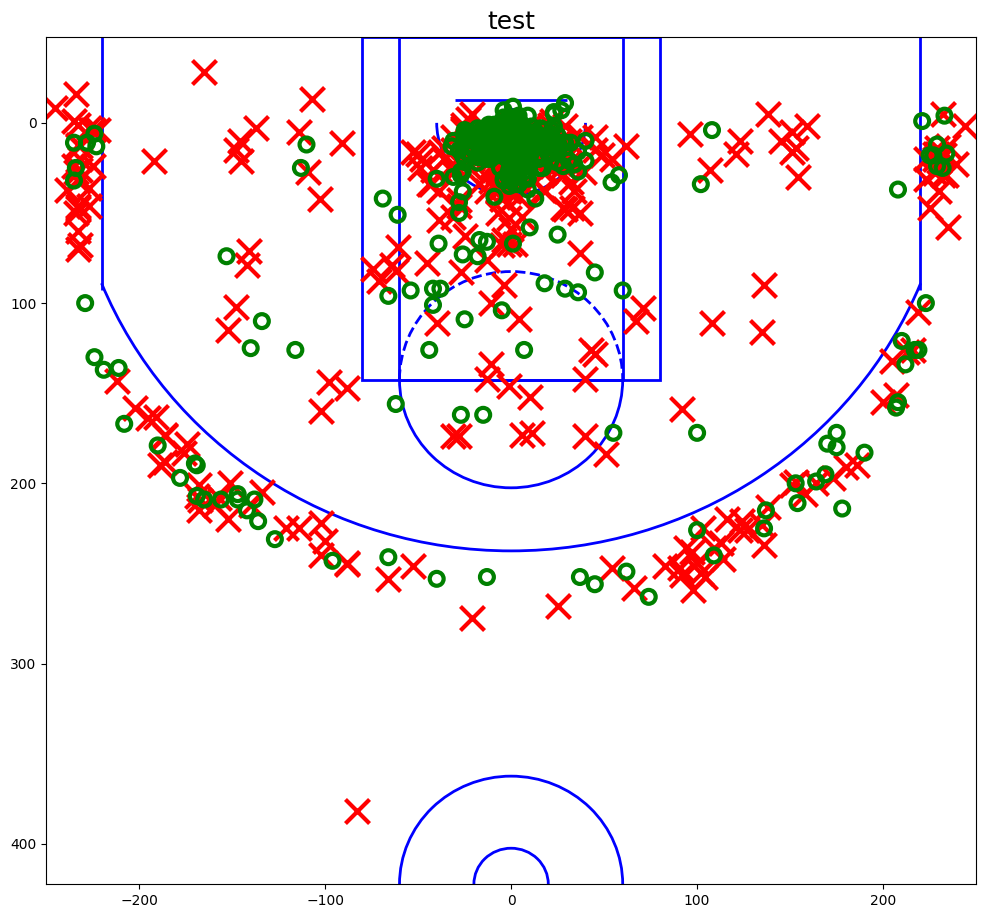

In [54]:
plt.rcParams['figure.figsize'] = (12, 11)

ax = plt.gca()
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# Create the basketball hoop
hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

# Create backboard
backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

# The paint
# Create the outer box 0f the paint, width=16ft, height=19ft
outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                        fill=False)
# Create the inner box of the paint, widt=12ft, height=19ft
inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                        fill=False)

# Create free throw top arc
top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                        linewidth=lw, color=color, fill=False)
# Create free throw bottom arc
bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color, linestyle='dashed')
# Restricted Zone, it is an arc with 4ft radius from center of the hoop
restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                    color=color)

# Three point line
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                            color=color)
# Create the right side 3pt lines, it's 14ft long before it arcs
corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
# 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                color=color)

# Center Court
center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                        linewidth=lw, color=color)
center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                        linewidth=lw, color=color)

inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)

# 60 degrees
inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
# 120 degrees
inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)

# Assume x distance is also 40 for the endpoint
inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)

# Assume y distance is also 92.5 for the endpoint
inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
    
    
court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    

ax.tick_params(labelbottom="off", labelleft="off")
ax.set_title(title, fontsize=18)



for element in court_elements:
    ax.add_patch(element)

# plot missed shots
# ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3)
# plot made shots
# ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3)
# plt.savefig('test.png')
plt.show()


In [45]:
shotchartlist[0].columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [46]:
data = shotchartlist[0]

In [47]:
x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

In [50]:
plt.show()